# 1.2: $d$-dimensional input Lin Reg


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

---------------- 
# Part 0: getting the data


In [2]:
def create_d_d_Data(N,thetas,D,sigmaNoise): 
    Xrange = 10
    ## x are random
    X = np.random.random((N,D+1))*Xrange   
    X [:0] = 1 # as if we stacked ones to a (N,D)-sized array of X
    ## the "y" (ordinates axis) are y=a.x+b + noise
    y = X @ thetas + np.random.normal(0,sigmaNoise,  (N,1))      # not available in real life
    return X, y

In [3]:
######### data creation #########
seed=42
np.random.seed(seed)
N = 50
D = 6 # for instance, D=6
thetaGT=np.random.random((D+1,1))                                  # not available in real life
sigmaNoise = 0.5                                                   # not available in real life
X, y = create_d_d_Data(N,thetaGT,D,sigmaNoise)                     # not available in real life
Ntest=N*2
Xtest, ytest = create_d_d_Data(Ntest,thetaGT,D,sigmaNoise) ## test data

In [4]:
X.shape, y.shape

((50, 7), (50, 1))

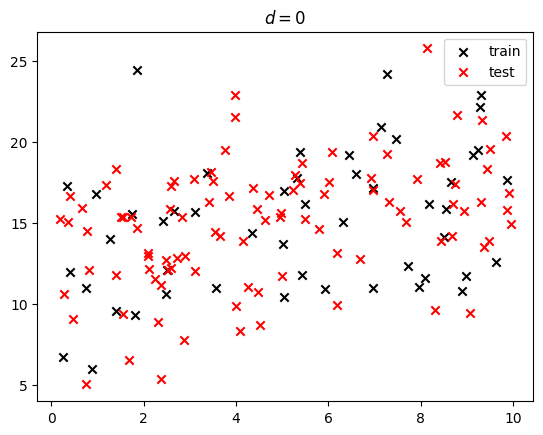

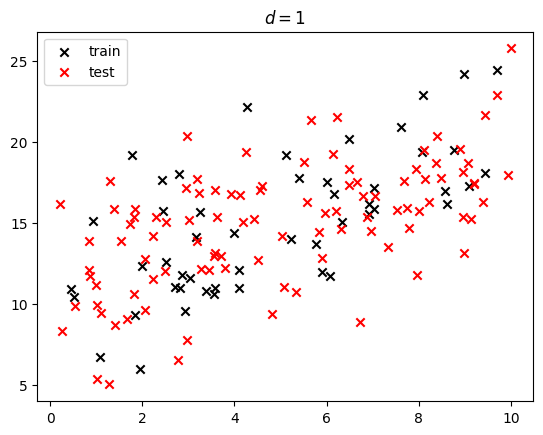

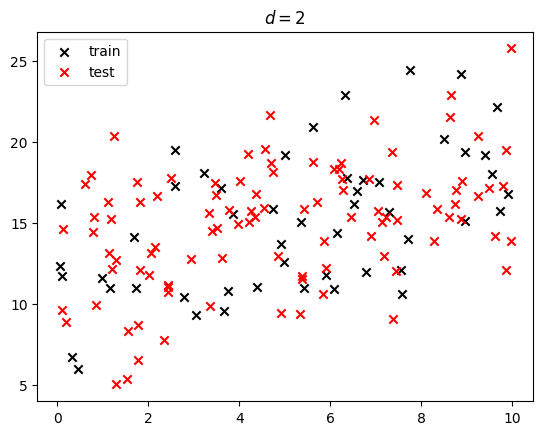

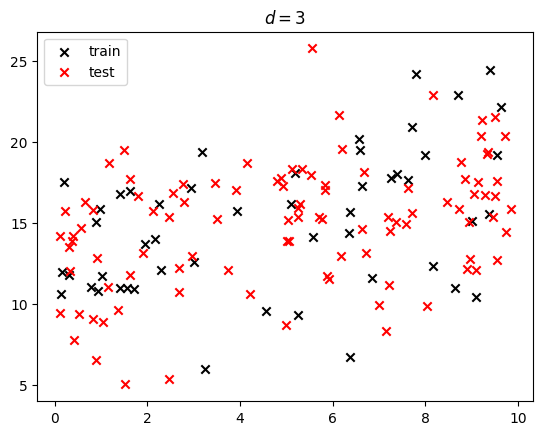

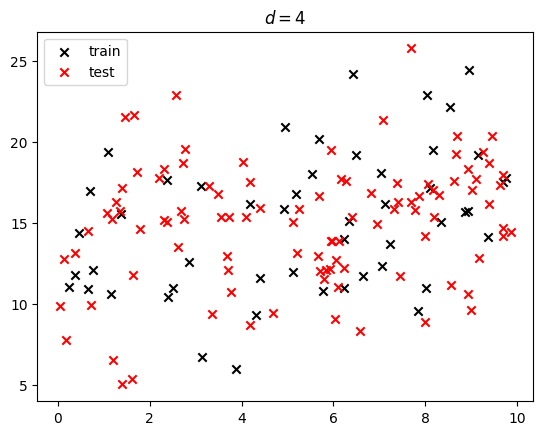

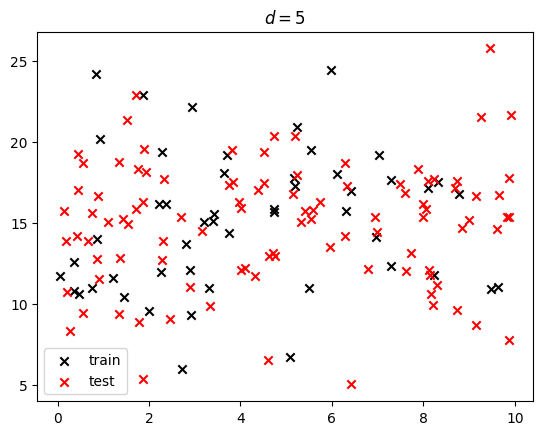

In [7]:
####### data visualization ###########
for d in range (0,D):
    plt.figure()
    plt.title('$d=$'+str(d))
    plt.scatter(X[:,d],y, label="train", marker='x',color='k')
    plt.scatter(Xtest[:,d],ytest, label= "test", marker='x',color='red')
    plt.legend()

# Part 1: handcrafted model

## 1. Model defintion, initalization

- create a model, i.e. a function $f_\Theta(x)$
- choose hyper-parameters `eta`, `MaxIter`, and set the dimension of data `D` appropriately
- make a stupid or random guess for an initial value of the parameters vector `theta`, i.e. for `thetaInitial`

In [8]:
def model(X, theta):
    ## a simple linear function
    return X @ theta

In [9]:
eta = 0.001
MaxIter = 10000
thetaInitial = np.random.random((D + 1, 1)) - 0.5

## 2. Update rule

### Now the crucial part 

- **take a piece of paper and a pencil, and derive the update rule for your function $f_\Theta(x)$**, according to the method of Grandient Descent. Really do it on paper, not on the computer !!
Use the Mean Squared Error Loss.

### Now to code it

- implement a function `fit(model, eta, MaxIter, D, theta, X, y)` that will update the parameters according to gradient descent
- run it !
- add a recording of train and test error to your fit function, so as to keep track of train and test error at all iterations of the algorithm
- since we have it, you may compare the ground truth parameters and your estimation of them

In [10]:
def fit(model, eta, MaxIter, theta, X, y):
    train_error = np.zeros(MaxIter)
    test_error = np.zeros(MaxIter)
    
    for iteration in range(MaxIter):
        theta -= X.T @ ( eta *2.0 / N * (model(X, theta) - y))
        train_error[iteration] = np.mean( (model(X, theta)-y)**2 )
        test_error[iteration] = np.mean( (model(Xtest, theta)-ytest)**2 )
        
    return theta, train_error, test_error

In [12]:
theta = thetaInitial.copy()
theta, train_error, test_error = fit(model, eta, MaxIter, theta, X, y)
theta

array([[0.39779783],
       [0.98378173],
       [0.72459562],
       [0.55958932],
       [0.14364669],
       [0.17858443],
       [0.05234008]])

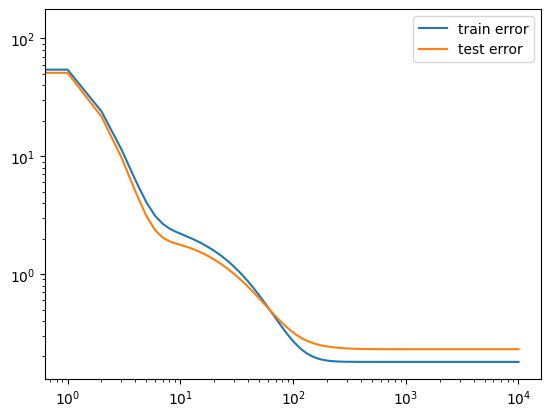

In [13]:
plt.loglog(train_error, label= "train error")
plt.loglog(test_error, label= "test error")
plt.legend()

In [14]:
theta / thetaGT    ,    theta - thetaGT

(array([[1.06209671],
        [1.03478166],
        [0.98989292],
        [0.93473881],
        [0.92070207],
        [1.14481222],
        [0.90111622]]),
 array([[ 0.02325771],
        [ 0.03306742],
        [-0.00739832],
        [-0.03906916],
        [-0.01237196],
        [ 0.02258991],
        [-0.00574353]]))